# <span style="color:powderblue">Retail Revenue Projection: Leveraging Linear Regression for Accurate Sales Forecasting</span>

This project, titled "Retail Revenue Projection," is a comprehensive exploration that harnesses synthetic sales data with intricate time series, seasonality, and weather conditions. The primary objective is to construct a robust linear regression model for precise sales forecasting in a retail environment. The code encompasses key stages, including data generation, exploratory data analysis (EDA) featuring interactive visualizations, feature engineering, and the hands-on training and evaluation of a linear regression model. The synthetic data incorporates diverse factors such as promotions, customer footfall, weather conditions, and time series trends. The EDA phase provides insightful visualizations illustrating the relationships between different features and sales, facilitating a deep understanding of key trends. Subsequently, the linear regression model is trained, evaluated, and its performance is assessed through metrics such as coefficients, accuracy, and a detailed residual distribution analysis. This project stands as a practical demonstration of applying machine learning techniques in retail analytics, offering valuable insights for accurate revenue projection and strategic decision-making.


## Libraries Import

In this Python notebook cell, essential libraries are imported for data manipulation, visualization, and machine learning. The libraries include:
- `numpy` for numerical operations,
- `pandas` for data manipulation,
- `matplotlib` and `seaborn` for data visualization,
- `scikit-learn` for machine learning tasks, such as model selection and linear regression,
- `joblib` for saving and loading models, and
- `ipywidgets` for creating interactive widgets.

This set of libraries establishes a foundation for conducting data analysis, visualization, and implementing machine learning algorithms within the notebook.


In [1]:
# Import necessary libraries
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib 
import ipywidgets as widgets
from ipywidgets import interact

## Data Generation Function: Synthetic Sales Data with Time Series, Seasonality, and Weather Conditions

The `generate_synthetic_data` function is designed to generate synthetic sales data for a retail environment, incorporating time series dynamics, seasonality, and diverse weather conditions. Key components of the function include:

- **Time Series and Seasonality:** The function introduces time series and seasonality through factors such as time_series_factor and seasonal_factor.

- **Weather Conditions:** The synthetic data includes weather conditions like 'Clear,' 'Cloudy,' 'Rainy,' and 'Snowy,' with corresponding coefficients affecting sales.

- **Promotions, Customer Footfall, and IsWeekend:** These factors contribute to the overall sales calculation.

- **Data Saving:** The generated synthetic data is saved to an Excel file named 'synthetic_data.xlsx.'

The function encapsulates a realistic blend of factors affecting retail sales and serves as a foundational step for subsequent analysis and modeling within the project.


In [2]:
def generate_synthetic_data(days=365, start_date='2022-01-01'):
    np.random.seed(42)

    date_rng = pd.date_range(start=start_date, periods=days, freq='D')
    promotions = np.random.randint(0, 2, days)
    weather_condition = np.random.choice(['Clear', 'Cloudy', 'Rainy', 'Snowy'], size=days)
    customer_footfall = np.random.randint(30, 150, days)
    is_weekend = np.random.randint(0, 2, days)

    # Introduce time series and seasonality
    time_series_factor = np.arange(1, days + 1)
    seasonal_factor = np.sin(2 * np.pi * time_series_factor / 365)
    sales_coefficients = {
        'Promotions': 7,
        'WeatherCondition': {'Clear': 10, 'Cloudy': 5, 'Rainy': -5, 'Snowy': -10},
        'CustomerFootfall': 2,
        'IsWeekend': 15,
        'TimeSeries': 0.1,  # Coefficient for time series factor
        'Seasonal': 20  # Coefficient for seasonal factor
    }
    sales_intercept = 50
    sales = (   
        sales_intercept +
        promotions * sales_coefficients['Promotions'] +
        np.array([sales_coefficients['WeatherCondition'][wc] for wc in weather_condition]) +
        customer_footfall * sales_coefficients['CustomerFootfall'] +
        is_weekend * sales_coefficients['IsWeekend'] +
        time_series_factor * sales_coefficients['TimeSeries'] +
        seasonal_factor * sales_coefficients['Seasonal'] +
        np.random.normal(0, 20, days)
    )
    data = pd.DataFrame({
        'Date': date_rng,
        'Promotions': promotions,
        'WeatherCondition': weather_condition,
        'CustomerFootfall': customer_footfall,
        'IsWeekend': is_weekend,
        'TimeSeriesFactor': time_series_factor,
        'SeasonalFactor': seasonal_factor,
        'Sales': sales
    })
    data.to_excel('synthetic_data.xlsx', index=False)
    print("Synthetic data saved to synthetic_data.xlsx")

    return data

## Exploratory Data Analysis (EDA) Function: Visualizing Sales Relationships

The `perform_eda` function conducts exploratory data analysis on the synthetic sales data, visualizing relationships between different features and sales. Key components of the function include:

- **Bar Plots:** For categorical features like 'Promotions,' 'WeatherCondition,' and 'IsWeekend,' bar plots depict the average sales for each category.

- **Scatter Plots with Regression Line:** For the 'CustomerFootfall' feature, scatter plots with a regression line are employed to illustrate the correlation between customer footfall and sales.

- **Line Plots:** For continuous features like 'TimeSeriesFactor' and 'SeasonalFactor,' line plots display the trends in relation to sales.

- **Interactive Plot:** An interactive plot with a button allows users to select features dynamically. Notably, for 'WeatherCondition,' a scatter plot is used to showcase the interplay between customer footfall, sales, and different weather conditions.

The function provides a visual narrative of how various factors influence sales, enhancing the understanding of the dataset's characteristics.


In [3]:
# Function for exploratory data analysis (EDA)
def perform_eda(data):
    # Visualize the relationship between each feature and sales
    plt.figure(figsize=(18, 12))

    features = ['Promotions', 'WeatherCondition', 'CustomerFootfall', 'IsWeekend', 'TimeSeriesFactor', 'SeasonalFactor']

    for i, feature in enumerate(features):
        plt.subplot(3, 2, i + 1)
        if feature in ['Promotions', 'WeatherCondition', 'IsWeekend']:
            sns.barplot(x=feature, y='Sales', data=data)
            plt.title(f'Average Sales by {feature}')
            if feature != 'Promotions':  # Exclude 'Promotions' from summary
                print(f"\nSummary Statistics for 'Sales' by {feature}:\n")
                for category in data[feature].unique():
                    subset = data[data[feature] == category]['Sales']
                    print(f"{feature} = {category}: Mean = {subset.mean():.2f}, Std Dev = {subset.std():.2f}")
        elif feature == 'CustomerFootfall':
            sns.scatterplot(x=feature, y='Sales', data=data, alpha=0.7)
            sns.regplot(x=feature, y='Sales', data=data, scatter=False, color='red')
            plt.title(f'{feature} vs Sales')
            print(f"\nSummary Statistics for 'Sales' by {feature}:\n")
            print("Mean Sales:", data['Sales'].mean())
            print("Standard Deviation of Sales:", data['Sales'].std())
        else:
            # Replace marker='o' with marker=None to remove circles
            plt.plot(data[feature], data['Sales'], marker=None, linestyle='-', color='b')
            plt.title(f'{feature} vs Sales')

    plt.tight_layout()
    plt.show()

    # Interactive plot with a button to select features
    @interact(feature=features)
    def plot_sales_vs_feature(feature):
        plt.figure(figsize=(10, 5))

        if feature == 'WeatherCondition':
            sns.scatterplot(x='CustomerFootfall', y='Sales', hue='WeatherCondition', data=data, alpha=0.7)
            plt.title('CustomerFootfall vs Sales with WeatherCondition')
            plt.xlabel('CustomerFootfall')
            plt.ylabel('Sales')
            plt.legend(title='WeatherCondition')
        elif feature == 'Promotions':
            sns.barplot(x=feature, y='Sales', data=data)
            plt.title(f'Promotions vs Sales')
            plt.xlabel('Promotions')
            plt.ylabel('Sales')
        else:
            sns.scatterplot(x=feature, y='Sales', data=data, alpha=0.7)
            sns.regplot(x=feature, y='Sales', data=data, scatter=False, color='red')
            plt.title(f'{feature} vs Sales')
            plt.xlabel(feature)
            plt.ylabel('Sales')

        plt.show()

## Model Training and Evaluation Function: Linear Regression for Sales Forecasting

The `train_evaluate_model` function performs the training and evaluation of a linear regression model using the synthetic sales data. Key elements of the function include:

- **Model Creation and Fitting:** A linear regression model is created and fitted to the training data, capturing relationships between features and sales.

- **Model Saving:** The trained model is saved to a file ('trained_model.joblib') using the joblib library for future use.

- **Model Loading:** The saved model is loaded back into the code for predictions and evaluation.

- **Prediction and Accuracy:** The model predicts sales on the test set, and its accuracy is calculated, providing a quantitative measure of performance.

- **Visualization of Predictions:** Actual vs predicted sales are visualized using a scatter plot, with an identity line for reference.

- **Residuals Distribution:** A histogram depicts the distribution of residuals (the difference between actual and predicted sales), aiding in understanding the model's predictive errors.

This function serves as a crucial step in the project, highlighting the model's accuracy and providing insights into its predictive capabilities.


In [4]:
# Replace the existing train_evaluate_model function with this updated version

def train_evaluate_model(X_encoded, y):
    # Create a linear regression model
    model = LinearRegression()

    # Split the data into training and testing sets
    X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_encoded, y_train)

    # Save the trained model to a file using joblib
    model_filename = 'trained_model.joblib'
    joblib.dump(model, model_filename)
    print(f"Trained model saved to {model_filename}")

    # Load the saved model
    loaded_model = joblib.load(model_filename)

    # Predict sales on the test set
    y_pred = loaded_model.predict(X_test_encoded)

    # Calculate accuracy
    accuracy = loaded_model.score(X_test_encoded, y_test)
    print(f"Model Accuracy: {accuracy}")

    # Visualize actual vs predicted sales
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)  # Identity line
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.show()

    # Plot histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(y_test - y_pred, kde=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.show()

    return model, accuracy


In [5]:
# # Load synthetic data
# synthetic_data = pd.read_excel('synthetic_data.xlsx')

# # Sidebar
# st.sidebar.title('Synthetic Data Generation')
# days_input = st.sidebar.slider('Number of Days', 30, 365, 365)
# start_date_input = st.sidebar.text_input('Start Date (YYYY-MM-DD)', '2022-01-01')
# if st.sidebar.button('Generate Synthetic Data'):
#     synthetic_data = generate_synthetic_data(days=days_input, start_date=start_date_input)

# # Main content
# st.title('Exploratory Data Analysis and Model Evaluation')

# # Perform EDA
# st.header('Exploratory Data Analysis (EDA)')
# perform_eda(synthetic_data)

# # Feature engineering with one-hot encoding
# X = synthetic_data[['Promotions', 'WeatherCondition', 'CustomerFootfall', 'IsWeekend', 'TimeSeriesFactor', 'SeasonalFactor']]
# X_encoded = pd.get_dummies(X, columns=['WeatherCondition'], drop_first=True)

# # Extract the target variable 'Sales'
# y = synthetic_data['Sales']

# # Split the data into training and testing sets
# X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Train and evaluate the linear regression model
# st.header('Model Evaluation')
# trained_model, mse_value = train_evaluate_model(X_train_encoded, X_test_encoded, y_train, y_test)

# # Display the trained model coefficients
# st.subheader('Trained Model Coefficients:')
# coefficients_df = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': trained_model.coef_})
# st.dataframe(coefficients_df)

# # Display the mean squared error
# st.subheader(f'Mean Squared Error: {mse_value}')

# # Predict sales on the test set
# y_pred = trained_model.predict(X_test_encoded)

# # Display actual vs. predicted sales
# results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
# st.subheader('Actual vs. Predicted Sales:')
# st.dataframe(results_df)

# Synthetic Data Generation and Feature Engineering

This code generates synthetic sales data incorporating time series, seasonality, and weather conditions. It then performs feature engineering by applying one-hot encoding to categorical variables.

Synthetic data saved to synthetic_data.xlsx

Summary Statistics for 'Sales' by WeatherCondition:

WeatherCondition = Rainy: Mean = 254.30, Std Dev = 75.55
WeatherCondition = Cloudy: Mean = 270.56, Std Dev = 76.11
WeatherCondition = Snowy: Mean = 237.83, Std Dev = 74.67
WeatherCondition = Clear: Mean = 271.55, Std Dev = 76.23

Summary Statistics for 'Sales' by CustomerFootfall:

Mean Sales: 257.68572348743305
Standard Deviation of Sales: 76.65974821862515

Summary Statistics for 'Sales' by IsWeekend:

IsWeekend = 0: Mean = 255.34, Std Dev = 75.04
IsWeekend = 1: Mean = 259.99, Std Dev = 78.36


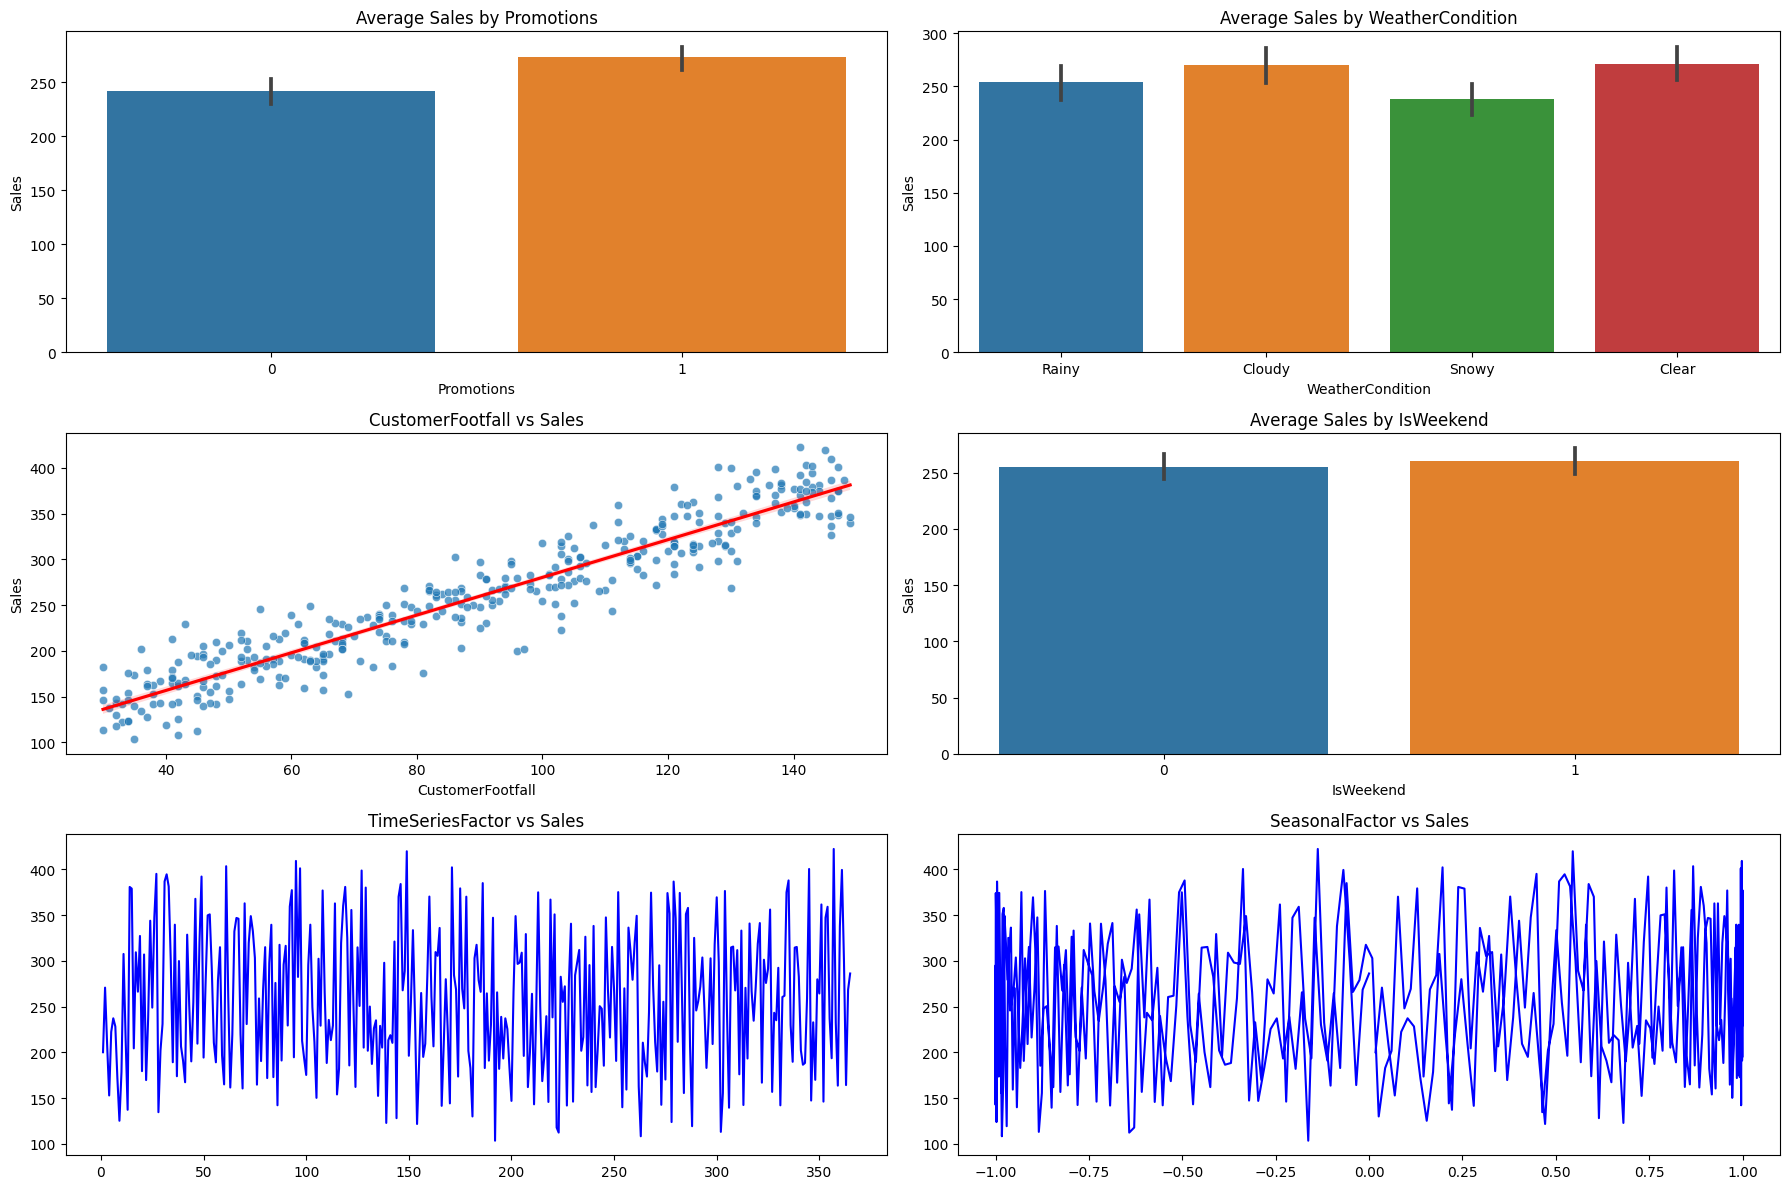

interactive(children=(Dropdown(description='feature', options=('Promotions', 'WeatherCondition', 'CustomerFoot…

In [6]:
# Generate synthetic data with time series, seasonality, and weather conditions
synthetic_data = generate_synthetic_data()

# Perform EDA
perform_eda(synthetic_data)

In [7]:
# Feature engineering with one-hot encoding
X = synthetic_data[['Promotions', 'WeatherCondition', 'CustomerFootfall', 'IsWeekend', 'TimeSeriesFactor', 'SeasonalFactor']]
X_encoded = pd.get_dummies(X, columns=['WeatherCondition'], drop_first=True)

# Extract the target variable 'Sales'
y = synthetic_data['Sales']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Linear Regression Model Evaluation

The linear regression model is trained and evaluated using the previously split datasets (`X_train_encoded`, `X_test_encoded`, `y_train`, and `y_test`). The model's performance metrics, including the Mean Squared Error (MSE), are calculated and displayed. Additionally, the coefficients of the trained model are presented, providing insights into the impact of each feature on the predicted sales. This comprehensive evaluation allows for a thorough understanding of the model's accuracy and the significance of different factors in predicting retail sales.


Trained model saved to trained_model.joblib
Model Accuracy: 0.912027126733637


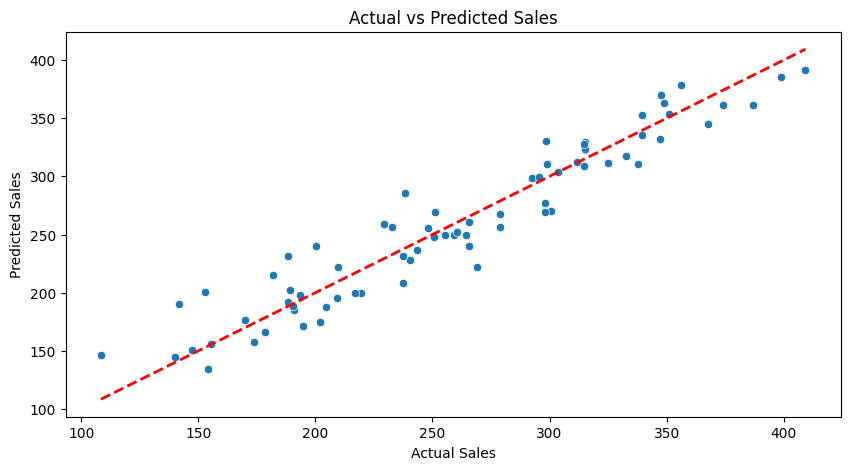

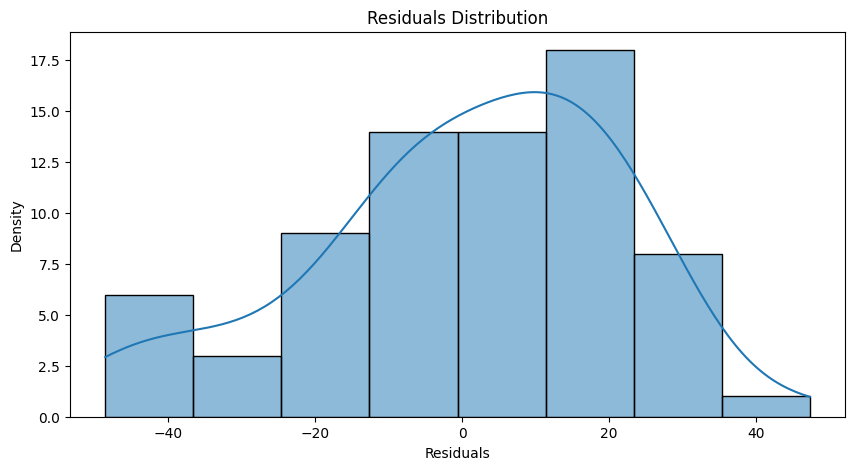

Trained Model Coefficients:
                    Feature  Coefficient
0               Promotions     7.825567
1         CustomerFootfall     2.039008
2                IsWeekend    14.159402
3         TimeSeriesFactor     0.097677
4           SeasonalFactor    18.694790
5  WeatherCondition_Cloudy    -3.373591
6   WeatherCondition_Rainy   -12.705866
7   WeatherCondition_Snowy   -19.963093
Mean Squared Error: 0.912027126733637

Actual vs. Predicted Sales:
      Actual Sales  Predicted Sales
193    182.075722       214.964770
33     300.800595       270.216289
15     204.454624       187.988161
309    311.811797       312.456070
57     315.004116       329.531158
..            ...              ...
203    298.190490       269.163205
82     339.532371       353.115549
94     409.258192       391.557732
192    265.659873       260.318765
325    356.152446       378.895441

[73 rows x 2 columns]


In [8]:
# Train and evaluate the linear regression model
trained_model, mse_value = train_evaluate_model(X_train_encoded, X_test_encoded, y_train, y_test)

# Display the trained model coefficients
coefficients_df = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': trained_model.coef_})
print("Trained Model Coefficients:\n", coefficients_df)

# Display the mean squared error
print(f"Mean Squared Error: {mse_value}")

# Predict sales on the test set
y_pred = trained_model.predict(X_test_encoded)

# Display actual vs. predicted sales
results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print("\nActual vs. Predicted Sales:\n", results_df)
